In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#pd.set_option('display.max_rows', 150)
#pd.set_option('display.min_rows', 65)
pd.set_option('display.max_columns', None)

In [10]:
df_base = pd.read_csv("..\DataSets\economicData_1960-2022_noNaN-drops.csv")


df_base = df_base[['Country Name', 'Index Year', 'GDP per capita (current USD)', 'Country Quintile']]
df_base.rename(columns={'GDP per capita (current USD)': 'GDP_perCapita'}, inplace=True)


# Calculating GDP per capita growth
df_base.sort_values(['Country Name', 'Index Year'], inplace=True)
df_base['GDP_perCapita_growth'] = df_base.groupby('Country Name')['GDP_perCapita'].pct_change()
df_base['GDP_perCapita_growth'].fillna(0, inplace=True)

# Defining GroupSets
We'll define groups to compare Brazil against:
- LatAm
- BRICS
- G20
- MidUpperIncome (3rd & 4th quintiles)


In [28]:
LatAm = [
    "Argentina",
    "Bolivia",
    "Brazil",
    "Chile",
    "Colombia",
    "Costa Rica",
    "Cuba",
    "Dominican Republic",
    "Ecuador",
    "El Salvador",
    "Guatemala",
    "Haiti",
    "Honduras",
    "Mexico",
    "Nicaragua",
    "Panama",
    "Paraguay",
    "Peru",
    "Uruguay",
    "Venezuela"
]


BRICS = [
    "Brazil",
    "Russia",
    "India",
    "China",
    "South Africa"
]

G20 = [
    "Argentina",
    "Australia",
    "Brazil",
    "Canada",
    "China",
    "France",
    "Germany",
    "India",
    "Indonesia",
    "Italy",
    "Japan",
    "Mexico",
    "Russia",
    "Saudi Arabia",
    "South Africa",
    "South Korea",
    "Turkey",
    "United Kingdom",
    "United States"
]

# Calculate the mode (most common value) for 'Country Quintile' for each country
df_base['Country Quintile'] = df_base.groupby('Country Name')['Country Quintile']\
                                .transform(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)


# Selecting any country that appear in Q3 and Q4
MidUpperIncome = list(df_base[(df_base['Country Quintile'] == 'Q3')\
                              | (df_base['Country Quintile'] == 'Q4')]['Country Name'].unique())

# Ranking Brazil in each group

### Latin America

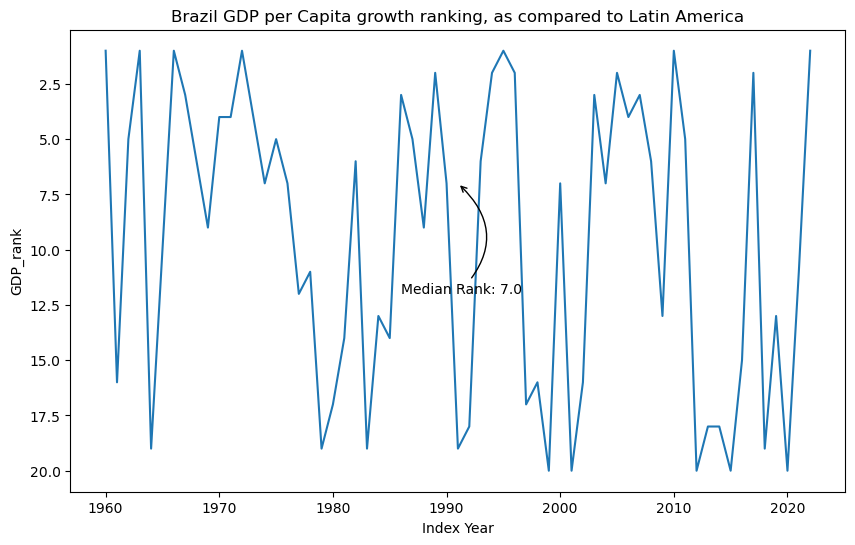

In [66]:
df_LatAM = df_base[df_base['Country Name'].isin(LatAm)].copy()


# Rank GDP_perCapita within each year
df_LatAM['GDP_rank'] = df_LatAM.groupby('Index Year')['GDP_perCapita_growth'].rank(ascending=False, method='min')



# Subset the dataframe for Brazil
df_Brazil = df_LatAM[df_LatAM['Country Name'] == 'Brazil']

# Plot using seaborn
plt.figure(figsize=(10,6))
sns.lineplot(x='Index Year', y='GDP_rank', data=df_Brazil)

# Calculate the median rank for Brazil
brazil_median_rank = df_Brazil['GDP_rank'].median()

# Annotate the median value on the plot
plt.annotate(f'Median Rank: {brazil_median_rank}', xy=(df_Brazil['Index Year'].median(), brazil_median_rank), 
             xytext=(df_Brazil['Index Year'].median() - 5, brazil_median_rank + 5),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5'))

plt.gca().invert_yaxis() # Invert y axis
plt.title('Brazil GDP per Capita growth ranking, as compared to Latin America')
plt.show()

### BRICS

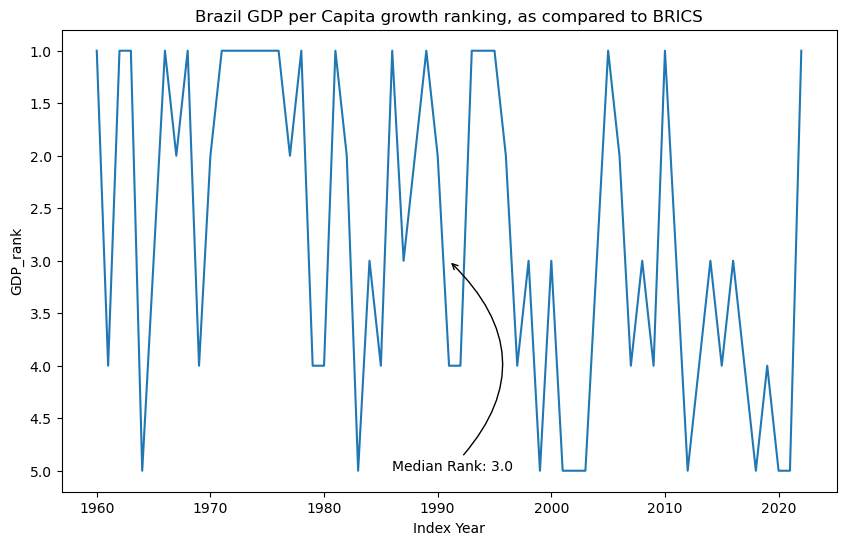

In [69]:
df_BRICS = df_base[df_base['Country Name'].isin(BRICS)].copy()


# Rank GDP_perCapita within each year
df_BRICS['GDP_rank'] = df_BRICS.groupby('Index Year')['GDP_perCapita_growth'].rank(ascending=False, method='min')



# Subset the dataframe for Brazil
df_Brazil = df_BRICS[df_BRICS['Country Name'] == 'Brazil']

# Plot using seaborn
plt.figure(figsize=(10,6))
sns.lineplot(x='Index Year', y='GDP_rank', data=df_Brazil)

# Calculate the median rank for Brazil
brazil_median_rank = df_Brazil['GDP_rank'].median()

# Annotate the median value on the plot
plt.annotate(f'Median Rank: {brazil_median_rank}', xy=(df_Brazil['Index Year'].median(), brazil_median_rank), 
             xytext=(df_Brazil['Index Year'].median() - 5, brazil_median_rank + 2),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5'))

plt.gca().invert_yaxis() # Invert y axis
plt.title('Brazil GDP per Capita growth ranking, as compared to BRICS')
plt.show()

### G20

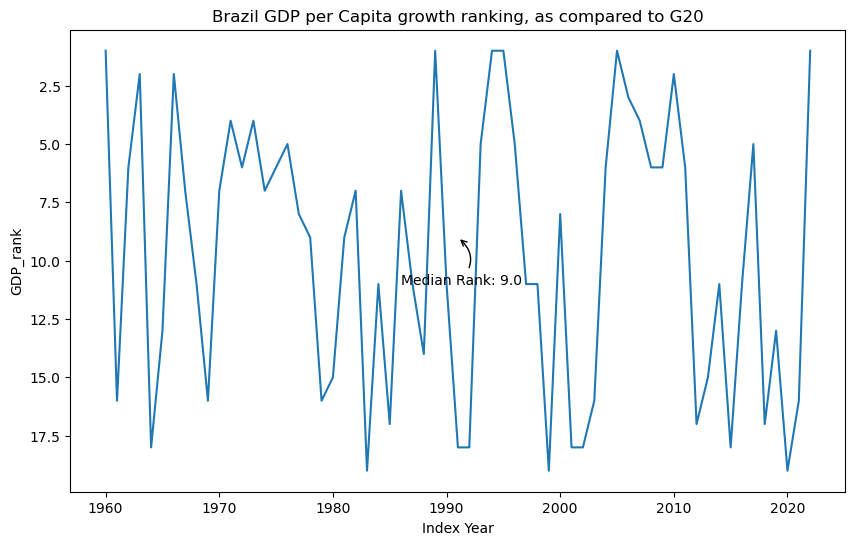

In [71]:
df_G20 = df_base[df_base['Country Name'].isin(G20)].copy()


# Rank GDP_perCapita within each year
df_G20['GDP_rank'] = df_G20.groupby('Index Year')['GDP_perCapita_growth'].rank(ascending=False, method='min')



# Subset the dataframe for Brazil
df_Brazil = df_G20[df_G20['Country Name'] == 'Brazil']

# Plot using seaborn
plt.figure(figsize=(10,6))
sns.lineplot(x='Index Year', y='GDP_rank', data=df_Brazil)

# Calculate the median rank for Brazil
brazil_median_rank = df_Brazil['GDP_rank'].median()

# Annotate the median value on the plot
plt.annotate(f'Median Rank: {brazil_median_rank}', xy=(df_Brazil['Index Year'].median(), brazil_median_rank), 
             xytext=(df_Brazil['Index Year'].median() - 5, brazil_median_rank + 2),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5'))

plt.gca().invert_yaxis() # Invert y axis
plt.title('Brazil GDP per Capita growth ranking, as compared to G20')
plt.show()

### Mid-Upper Income Countries

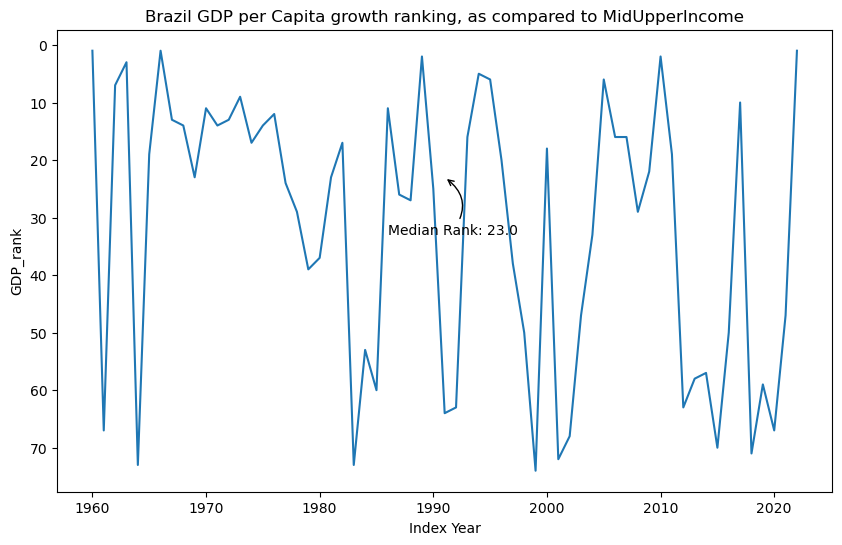

In [73]:
df_MidUpperIncome = df_base[df_base['Country Name'].isin(MidUpperIncome)].copy()


# Rank GDP_perCapita within each year
df_MidUpperIncome['GDP_rank'] = df_MidUpperIncome.groupby('Index Year')['GDP_perCapita_growth'].rank(ascending=False, method='min')



# Subset the dataframe for Brazil
df_Brazil = df_MidUpperIncome[df_MidUpperIncome['Country Name'] == 'Brazil']

# Plot using seaborn
plt.figure(figsize=(10,6))
sns.lineplot(x='Index Year', y='GDP_rank', data=df_Brazil)

# Calculate the median rank for Brazil
brazil_median_rank = df_Brazil['GDP_rank'].median()

# Annotate the median value on the plot
plt.annotate(f'Median Rank: {brazil_median_rank}', xy=(df_Brazil['Index Year'].median(), brazil_median_rank), 
             xytext=(df_Brazil['Index Year'].median() - 5, brazil_median_rank + 10),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5'))

plt.gca().invert_yaxis() # Invert y axis
plt.title('Brazil GDP per Capita growth ranking, as compared to MidUpperIncome')
plt.show()